In [19]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ott_churn_model_dataset.csv')

# Data Preprocessing
X = data.drop(columns=['year', 'customer_id', 'phone_no', 'churn', 'gender', 'mail_subscribed', 'multi_screen'])
y = data['churn']

# Handling missing values
X = X.fillna(X.mean())
data = data.dropna(subset=['churn'])
data['churn'] = data['churn'].astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Models Initialization
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)
dnn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Train Models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dnn.fit(X_train, y_train)

# Model Predictions
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
dnn_probs = dnn.predict_proba(X_test)[:, 1]

# ROC Curves
plt.figure(figsize=(10, 6))
for model_name, probs in [('Logistic Regression', log_reg_probs), ('SVM', svm_probs), ('DNN', dnn_probs)]:
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmaps
for model_name, model in [('Logistic Regression', log_reg), ('SVM', svm), ('DNN', dnn)]:
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Profit Curves
plt.figure(figsize=(10, 6))
for model_name, probs in [('Logistic Regression', log_reg_probs), ('SVM', svm_probs), ('DNN', dnn_probs)]:
    precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
    profits = recalls * (precisions / (precisions + (1 - recalls)))  # Simplified profit proxy
    plt.plot(thresholds, profits[:-1], label=model_name)
plt.title('Profit Curve')
plt.xlabel('Threshold')
plt.ylabel('Profit Proxy')
plt.legend()
plt.show()


# Saving the code as a Jupyter Notebook file
notebook_path = "/mnt/data/Customer_Churn_Prediction.ipynb"
with open(notebook_path, "w") as f:
    f.write(notebook_code)

notebook_path


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [4]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())


Shape of X: (2000, 9)
Shape of y: (2000,)

First few rows of X:
   age  no_of_days_subscribed  weekly_mins_watched  minimum_daily_mins  \
0   36                     62               148.35                12.2   
1   39                    149               294.45                 7.7   
2   65                    126                87.30                11.9   
3   24                    131               321.30                 9.5   
4   40                    191               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls  
0                    4.0                       1  
1   

In [5]:
print("Missing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())


Missing values in X:
age                       0
no_of_days_subscribed     0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
dtype: int64

Missing values in y:
35


In [6]:
print("Infinite values in X:")
print(np.isinf(X).sum())


Infinite values in X:
age                       0
no_of_days_subscribed     0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
dtype: int64


In [7]:
X = X.fillna(X.mean())


In [8]:
y = y.dropna()

In [9]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)


In [10]:
print("Missing values in X after cleaning:")
print(X.isnull().sum())
print("\nInfinite values in X after cleaning:")
print(np.isinf(X).sum())

print("\nMissing values in y after cleaning:")
print(y.isnull().sum())


Missing values in X after cleaning:
age                       0
no_of_days_subscribed     0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
dtype: int64

Infinite values in X after cleaning:
age                       0
no_of_days_subscribed     0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
dtype: int64

Missing values in y after cleaning:
0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Train-Test Split Successful!")


ValueError: Found input variables with inconsistent numbers of samples: [2000, 1965]

In [12]:
print("X dimensions:", X.shape)
print("y dimensions:", y.shape)


X dimensions: (2000, 9)
y dimensions: (1965,)


In [14]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2000, 9)
Shape of y: (1965,)


In [15]:
X = X.loc[y.index]


In [16]:
print("New Shape of X:", X.shape)
print("New Shape of y:", y.shape)


New Shape of X: (1965, 9)
New Shape of y: (1965,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Train-Test Split Successful!")


Train-Test Split Successful!


In [18]:
y = y.dropna()


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ott_churn_model_dataset.csv')

# Data Preprocessing
X = data.drop(columns=['year', 'customer_id', 'phone_no', 'churn', 'gender', 'mail_subscribed', 'multi_screen'])
y = data['churn']

# Handling missing values
X = X.fillna(X.mean())
data = data.dropna(subset=['churn'])
data['churn'] = data['churn'].astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Models Initialization
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)
dnn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Train Models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dnn.fit(X_train, y_train)

# Model Predictions
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
dnn_probs = dnn.predict_proba(X_test)[:, 1]

# ROC Curves
plt.figure(figsize=(10, 6))
for model_name, probs in [('Logistic Regression', log_reg_probs), ('SVM', svm_probs), ('DNN', dnn_probs)]:
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmaps
for model_name, model in [('Logistic Regression', log_reg), ('SVM', svm), ('DNN', dnn)]:
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Profit Curves
plt.figure(figsize=(10, 6))
for model_name, probs in [('Logistic Regression', log_reg_probs), ('SVM', svm_probs), ('DNN', dnn_probs)]:
    precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
    profits = recalls * (precisions / (precisions + (1 - recalls)))  # Simplified profit proxy
    plt.plot(thresholds, profits[:-1], label=model_name)
plt.title('Profit Curve')
plt.xlabel('Threshold')
plt.ylabel('Profit Proxy')
plt.legend()
plt.show()


# Saving the code as a Jupyter Notebook file
notebook_path = "/mnt/data/Customer_Churn_Prediction.ipynb"
with open(notebook_path, "w") as f:
    f.write(notebook_code)

notebook_path


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [21]:
# Check for NaN values in X and y
print("NaN values in X:", X.isnull().sum().sum())
print("NaN values in y:", y.isnull().sum())

# Check for infinite values in X
print("Infinite values in X:", np.isinf(X).sum().sum())


NaN values in X: 0
NaN values in y: 35
Infinite values in X: 0


In [23]:
# Replace NaN values in X with column means
X.fillna(X.mean(), inplace=True)

# Replace infinite values in X with NaN, then replace those with column means
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)


In [24]:
# Check for NaN or infinite values again
print("NaN values in X after cleaning:", X.isnull().sum().sum())
print("Infinite values in X after cleaning:", np.isinf(X).sum().sum())
print("NaN values in y after cleaning:", y.isnull().sum())


NaN values in X after cleaning: 0
Infinite values in X after cleaning: 0
NaN values in y after cleaning: 35


In [25]:
# Align X to y
X = X.loc[y.index]

# Check the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2000, 9)
Shape of y: (2000,)


In [29]:
print("Unique values in y:", y.unique())


Unique values in y: [0. 1.]


In [28]:
y = y[y.isin([0, 1])]


In [30]:
print(X.dtypes)
print(y.dtype)


age                         int64
no_of_days_subscribed       int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
dtype: object
float64


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Train-Test Split Successful!")


ValueError: Found input variables with inconsistent numbers of samples: [2000, 1965]

In [33]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2000, 9)
Shape of y: (1965,)


In [34]:
print("Number of rows in y:", len(y))


Number of rows in y: 1965


In [35]:
print("Number of rows in X:", X.shape[0])


Number of rows in X: 2000


In [36]:
# Align X to match y's index
X = X.loc[y.index]

# Confirm shapes are now consistent
print("Aligned Shape of X:", X.shape)
print("Shape of y:", y.shape)


Aligned Shape of X: (1965, 9)
Shape of y: (1965,)


In [37]:
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())


Missing values in X: 0
Missing values in y: 0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Train-Test Split Successful!")


Train-Test Split Successful!


In [39]:
print("Number of rows in X:", X.shape[0])
print("Number of rows in y:", len(y))


Number of rows in X: 1965
Number of rows in y: 1965


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ott_churn_model_dataset.csv')

# Data Preprocessing
X = data.drop(columns=['year', 'customer_id', 'phone_no', 'churn', 'gender', 'mail_subscribed', 'multi_screen'])
y = data['churn']

# Handling missing values
X = X.fillna(X.mean())
data = data.dropna(subset=['churn'])
data['churn'] = data['churn'].astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Models Initialization
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)
dnn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Train Models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dnn.fit(X_train, y_train)

# Model Predictions
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
dnn_probs = dnn.predict_proba(X_test)[:, 1]

# ROC Curves
plt.figure(figsize=(10, 6))
for model_name, probs in [('Logistic Regression', log_reg_probs), ('SVM', svm_probs), ('DNN', dnn_probs)]:
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmaps
for model_name, model in [('Logistic Regression', log_reg), ('SVM', svm), ('DNN', dnn)]:
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Profit Curves
plt.figure(figsize=(10, 6))
for model_name, probs in [('Logistic Regression', log_reg_probs), ('SVM', svm_probs), ('DNN', dnn_probs)]:
    precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
    profits = recalls * (precisions / (precisions + (1 - recalls)))  # Simplified profit proxy
    plt.plot(thresholds, profits[:-1], label=model_name)
plt.title('Profit Curve')
plt.xlabel('Threshold')
plt.ylabel('Profit Proxy')
plt.legend()
plt.show()


# Saving the code as a Jupyter Notebook file
notebook_path = "/mnt/data/Customer_Churn_Prediction.ipynb"
with open(notebook_path, "w") as f:
    f.write(notebook_code)

notebook_path


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [42]:
import numpy as np

# Check for NaN values
print("NaN values in X_scaled:", np.isnan(X_scaled).sum())

# Check for infinite values
print("Infinite values in X_scaled:", np.isinf(X_scaled).sum())


NaN values in X_scaled: 0
Infinite values in X_scaled: 0


In [43]:
# Replace NaN and infinite values with 0 or column mean
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=0.0, neginf=0.0)


In [44]:
print("NaN values in X_scaled after cleaning:", np.isnan(X_scaled).sum())
print("Infinite values in X_scaled after cleaning:", np.isinf(X_scaled).sum())


NaN values in X_scaled after cleaning: 0
Infinite values in X_scaled after cleaning: 0


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Train-Test Split Successful!")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [46]:
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y:", y.shape)


Shape of X_scaled: (2000, 9)
Shape of y: (2000,)


In [47]:
import pandas as pd
y = pd.Series(y)  # Ensure y is a Series



In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Train-Test Split Successful!")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [49]:
print("NaN values in X_scaled:", np.isnan(X_scaled).sum())
print("Infinite values in X_scaled:", np.isinf(X_scaled).sum())


NaN values in X_scaled: 0
Infinite values in X_scaled: 0


In [51]:
if np.isnan(X_scaled).sum() > 0 or np.isinf(X_scaled).sum() > 0:
    print("Problematic rows in X_scaled:")
    print(X_scaled[np.isnan(X_scaled).any(axis=1)])


In [52]:
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)


In [53]:
print("Unique values in y:", np.unique(y))
print("Type of y:", type(y))
print("Shape of y:", y.shape)


Unique values in y: [ 0.  1. nan]
Type of y: <class 'pandas.core.series.Series'>
Shape of y: (2000,)


In [57]:
assert set(np.unique(y)) <= {0, 1}, "y contains invalid values!"


AssertionError: y contains invalid values!

In [58]:
print("Unique values in y:", np.unique(y))


Unique values in y: [ 0.  1. nan]


In [59]:
invalid_rows = y[~np.isin(y, [0, 1])]
print("Invalid values in y:", invalid_rows)


Invalid values in y: 81     NaN
82     NaN
120    NaN
121    NaN
156    NaN
157    NaN
194    NaN
195    NaN
228    NaN
290    NaN
291    NaN
364    NaN
365    NaN
410    NaN
451    NaN
452    NaN
495    NaN
535    NaN
536    NaN
537    NaN
538    NaN
676    NaN
677    NaN
678    NaN
767    NaN
768    NaN
813    NaN
875    NaN
876    NaN
910    NaN
911    NaN
915    NaN
1993   NaN
1994   NaN
1995   NaN
Name: churn, dtype: float64


In [61]:
valid_indices = np.isin(y, [0, 1])  # Indices where y is either 0 or 1
X = X[valid_indices]
y = y[valid_indices]


In [62]:
print("Shape of X after filtering:", X.shape)
print("Shape of y after filtering:", y.shape)
print("Unique values in y after filtering:", np.unique(y))


Shape of X after filtering: (1965, 9)
Shape of y after filtering: (1965,)
Unique values in y after filtering: [0. 1.]


In [63]:
assert set(np.unique(y)) <= {0, 1}, "y contains invalid values!"


In [64]:
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y:", y.shape)
assert X_scaled.shape[0] == y.shape[0], "Mismatch in number of samples between X_scaled and y!"


Shape of X_scaled: (2000, 9)
Shape of y: (1965,)


AssertionError: Mismatch in number of samples between X_scaled and y!

In [65]:
print("Shape of original data:", data.shape)


Shape of original data: (1965, 16)


In [66]:
print("Shape of y before alignment:", y.shape)


Shape of y before alignment: (1965,)


In [67]:
X = X.loc[y.index]  # Align X with y's index


In [68]:
print("Shape of X after alignment:", X.shape)
print("Shape of y after alignment:", y.shape)


Shape of X after alignment: (1965, 9)
Shape of y after alignment: (1965,)


In [69]:
print("NaN values in X:", X.isnull().sum().sum())
print("NaN values in y:", y.isnull().sum())


NaN values in X: 0
NaN values in y: 0


In [70]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Train-Test Split Successful!")


Train-Test Split Successful!


In [73]:
X = data.drop(columns=['year', 'customer_id', 'phone_no', 'churn', 'gender', 'mail_subscribed', 'multi_screen'])
y = data['churn']

# Handle missing values
X.fillna(X.mean(), inplace=True)
y = y.dropna()
X = X.loc[y.index]  # Align X and y


In [74]:
assert X.shape[0] == y.shape[0], "Mismatch still exists between X and y!"
print("Shapes are aligned.")


Shapes are aligned.


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train-Test Split Successful!")
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Train-Test Split Successful!
Training set size: 1375
Test set size: 590


In [77]:
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("Class distribution in y_test:")
print(y_test.value_counts(normalize=True))


Class distribution in y_train:
0    0.866909
1    0.133091
Name: churn, dtype: float64
Class distribution in y_test:
0    0.866102
1    0.133898
Name: churn, dtype: float64


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ott_churn_model_dataset.csv')

# Data Preprocessing
X = data.drop(columns=['year', 'customer_id', 'phone_no', 'churn', 'gender', 'mail_subscribed', 'multi_screen'])
y = data['churn']

# Handling missing values
X = X.fillna(X.mean())
data = data.dropna(subset=['churn'])
data['churn'] = data['churn'].astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Models Initialization
log_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)
dnn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Train Models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dnn.fit(X_train, y_train)

# Model Predictions
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
dnn_probs = dnn.predict_proba(X_test)[:, 1]

# ROC Curves
plt.figure(figsize=(10, 6))
for model_name, probs in [('Logistic Regression', log_reg_probs), ('SVM', svm_probs), ('DNN', dnn_probs)]:
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmaps
for model_name, model in [('Logistic Regression', log_reg), ('SVM', svm), ('DNN', dnn)]:
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Profit Curves
plt.figure(figsize=(10, 6))
for model_name, probs in [('Logistic Regression', log_reg_probs), ('SVM', svm_probs), ('DNN', dnn_probs)]:
    precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
    profits = recalls * (precisions / (precisions + (1 - recalls)))  # Simplified profit proxy
    plt.plot(thresholds, profits[:-1], label=model_name)
plt.title('Profit Curve')
plt.xlabel('Threshold')
plt.ylabel('Profit Proxy')
plt.legend()
plt.show()


# Saving the code as a Jupyter Notebook file
notebook_path = "/mnt/data/Customer_Churn_Prediction.ipynb"
with open(notebook_path, "w") as f:
    f.write(notebook_code)

notebook_path


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv("ott_churn_model_dataset.csv")

# Drop irrelevant columns (update based on your dataset)
X = data.drop(columns=['year', 'customer_id', 'phone_no', 'churn', 'gender', 'mail_subscribed', 'multi_screen'])
y = data['churn']

# Step 1: Handle Missing Values
X.fillna(X.mean(), inplace=True)  # Fill missing values in features
y.dropna(inplace=True)  # Drop rows with missing target values
X = X.loc[y.index]  # Align X with y

# Step 2: Replace Infinite Values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)  # Replace infinite values with column means

# Step 3: Validate Shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
assert X.shape[0] == y.shape[0], "Mismatch in number of samples between X and y!"

# Step 4: Convert Target Variable to Binary and Ensure Compatibility
y = y.astype(int)
print("Unique values in y:", np.unique(y))

# Step 5: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Validate Clean Data
print("NaN values in X_scaled:", np.isnan(X_scaled).sum())
print("Infinite values in X_scaled:", np.isinf(X_scaled).sum())
assert np.isnan(X_scaled).sum() == 0, "NaN values found in X_scaled!"
assert np.isinf(X_scaled).sum() == 0, "Infinite values found in X_scaled!"

# Step 7: Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Step 8: Confirm Split
print("Train-Test Split Successful!")
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Class distribution in y_train:", np.unique(y_train, return_counts=True))
print("Class distribution in y_test:", np.unique(y_test, return_counts=True))


Shape of X: (1965, 9)
Shape of y: (1965,)
Unique values in y: [0 1]
NaN values in X_scaled: 0
Infinite values in X_scaled: 0
Train-Test Split Successful!
Training set size: 1375
Test set size: 590
Class distribution in y_train: (array([0, 1]), array([1192,  183], dtype=int64))
Class distribution in y_test: (array([0, 1]), array([511,  79], dtype=int64))


In [4]:
import os
print(os.getcwd())  # Prints the current working directory


C:\Windows\System32


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test)
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]  # Probability scores

# Print metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_reg_probs))


Logistic Regression Accuracy: 0.8610169491525423
Logistic Regression ROC-AUC: 0.7296192623052343


In [8]:
from sklearn.svm import SVC

# Train SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
svm_probs = svm.predict_proba(X_test)[:, 1]

# Print metrics
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM ROC-AUC:", roc_auc_score(y_test, svm_probs))


SVM Accuracy: 0.8847457627118644
SVM ROC-AUC: 0.7822338923431347


In [9]:
from sklearn.neural_network import MLPClassifier

# Train DNN
dnn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
dnn.fit(X_train, y_train)

# Predict and evaluate
y_pred_dnn = dnn.predict(X_test)
dnn_probs = dnn.predict_proba(X_test)[:, 1]

# Print metrics
print("DNN Accuracy:", accuracy_score(y_test, y_pred_dnn))
print("DNN ROC-AUC:", roc_auc_score(y_test, dnn_probs))


DNN Accuracy: 0.8542372881355932
DNN ROC-AUC: 0.7711114964452922


C:\Users\Pranit Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


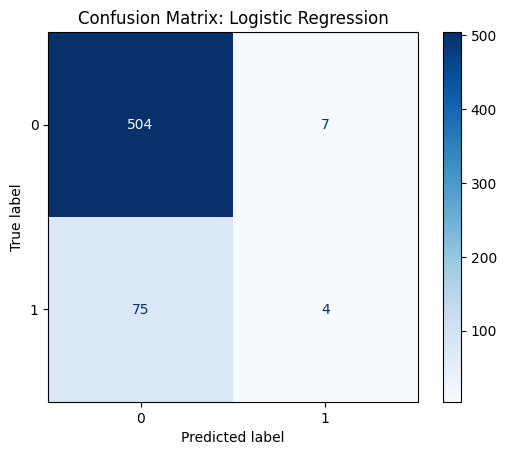

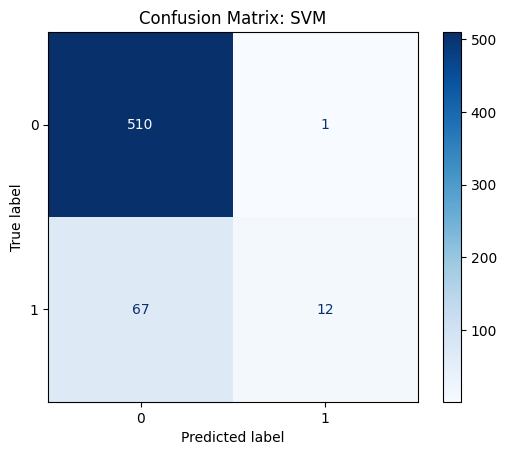

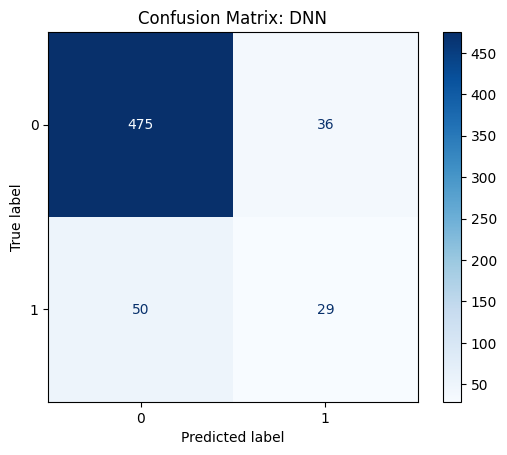

In [10]:
# Logistic Regression Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# SVM Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap="Blues")
plt.title("Confusion Matrix: SVM")
plt.show()

# DNN Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dnn)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap="Blues")
plt.title("Confusion Matrix: DNN")
plt.show()


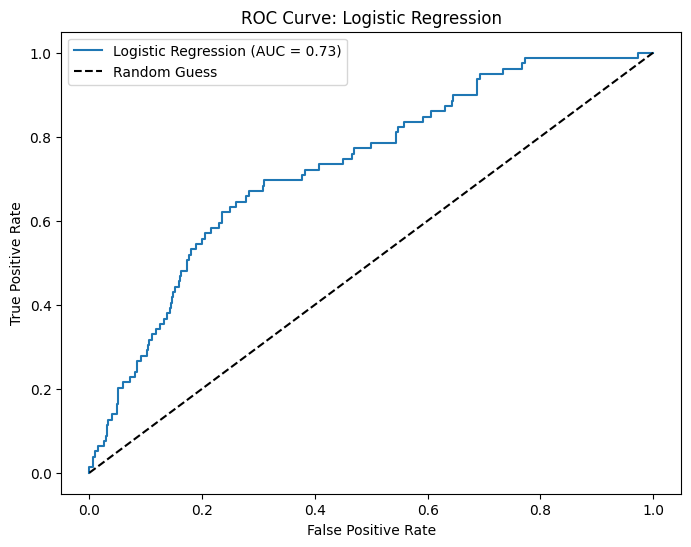

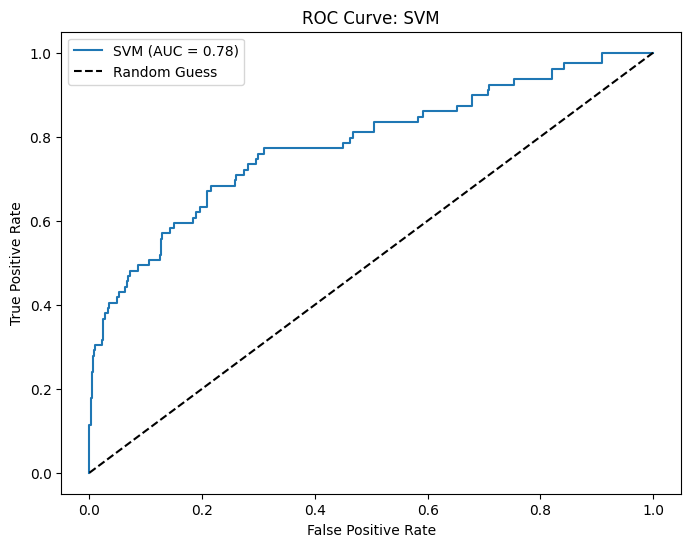

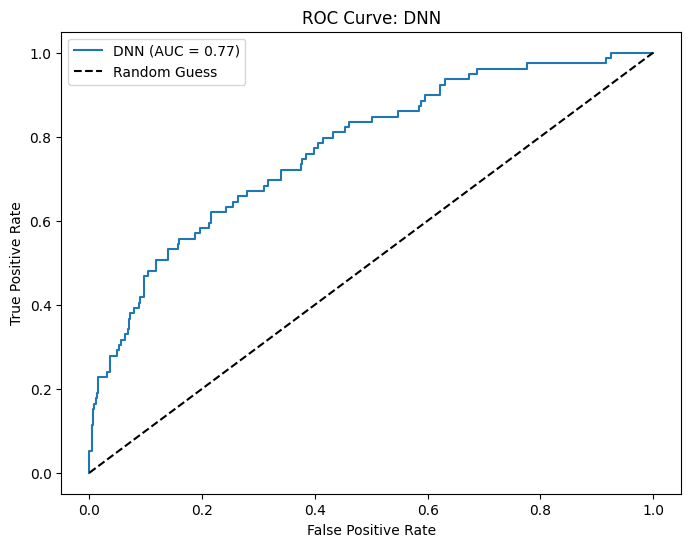

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_reg_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, log_reg_probs)))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# SVM ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="SVM (AUC = {:.2f})".format(roc_auc_score(y_test, svm_probs)))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve: SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# DNN ROC Curve
fpr, tpr, _ = roc_curve(y_test, dnn_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="DNN (AUC = {:.2f})".format(roc_auc_score(y_test, dnn_probs)))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve: DNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


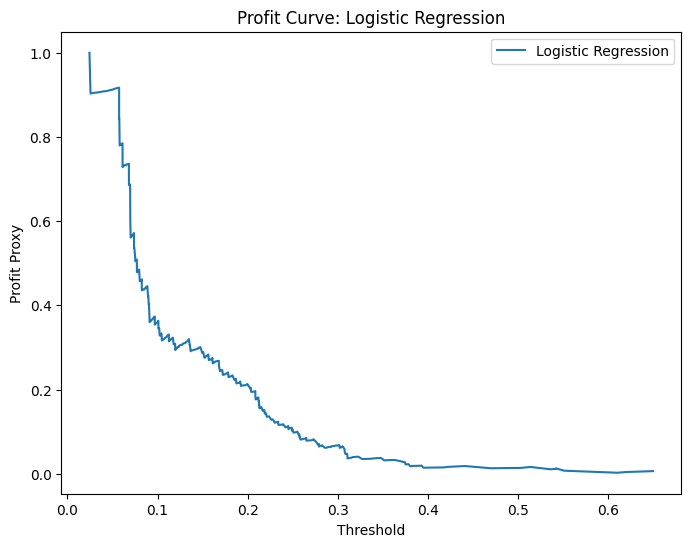

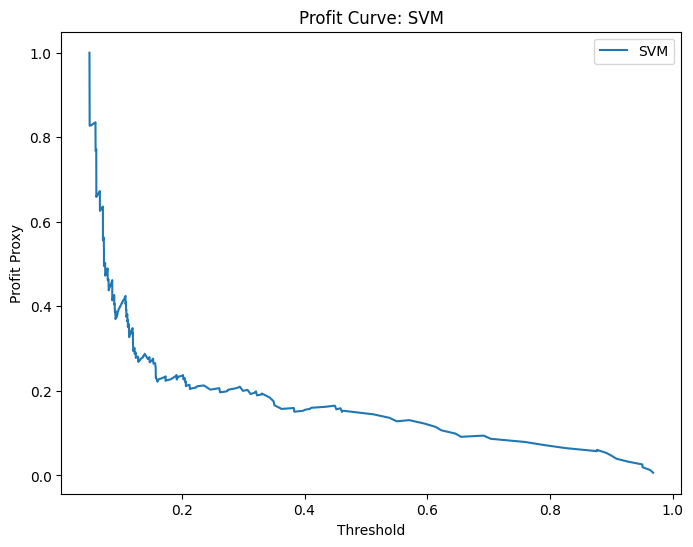

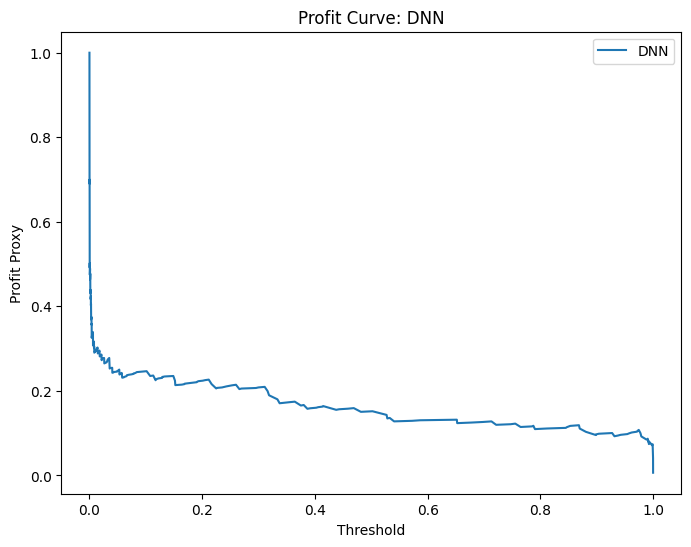

In [13]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Logistic Regression Profit Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, log_reg_probs)
profits = recalls * (precisions / (precisions + (1 - recalls)))  # Simplified profit proxy
plt.figure(figsize=(8, 6))
plt.plot(thresholds, profits[:-1], label="Logistic Regression")
plt.title("Profit Curve: Logistic Regression")
plt.xlabel("Threshold")
plt.ylabel("Profit Proxy")
plt.legend()
plt.show()

# SVM Profit Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_probs)
profits = recalls * (precisions / (precisions + (1 - recalls)))  # Simplified profit proxy
plt.figure(figsize=(8, 6))
plt.plot(thresholds, profits[:-1], label="SVM")
plt.title("Profit Curve: SVM")
plt.xlabel("Threshold")
plt.ylabel("Profit Proxy")
plt.legend()
plt.show()

# DNN Profit Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, dnn_probs)
profits = recalls * (precisions / (precisions + (1 - recalls)))  # Simplified profit proxy
plt.figure(figsize=(8, 6))
plt.plot(thresholds, profits[:-1], label="DNN")
plt.title("Profit Curve: DNN")
plt.xlabel("Threshold")
plt.ylabel("Profit Proxy")
plt.legend()
plt.show()
